In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd 

In [2]:
# windows korean font settings (code may vary based on your OS and available fonts)

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 매출액 기반 상권 유형화

In [3]:
# 골목상권, 발달상권 shp 파일 불러오기 

golmok = gpd.read_file("C:/Users/고양연구원/Desktop/지역경제/고양시_발달골목상권_SHAPE/골목상권_고양시_5181.shp", encoding='cp949')
baldal = gpd.read_file("C:/Users/고양연구원/Desktop/지역경제/고양시_발달골목상권_SHAPE/발달상권_고양시_5181.shp", encoding='cp949')
print(golmok.head())
print(baldal.head())

   trdar_id trdar_se_c tdmkt_clss trdar_nm main_biztp       min_xcrd  \
0      1860          2       None      지도로       None  184398.811692   
1      1083          2       None  고풍로43번길       None  181683.969308   
2      1117          2       None    신원로1길       None  190051.626481   
3      1045          2       None  지도로35번길       None  184142.107275   
4      1037          2       None     동산2로       None  189662.553056   

        min_ycrd       max_xcrd       max_ycrd      cntr_xcrd      cntr_ycrd  \
0  458315.993000  184820.248879  458811.215166  184569.984898  458565.776146   
1  462125.632490  182285.895708  462438.063794  181940.252876  462294.688334   
2  462272.438638  190333.563681  462561.059480  190192.559867  462417.285578   
3  457941.045400  184375.372020  458064.645588  184237.022676  458001.914856   
4  460329.347398  190029.134073  460605.716211  189869.886738  460465.846426   

        relm_ar   dong_cd reg_ymd  \
0  82623.448830  31101640    None   
1  94268.825

C:\Users\고양연구원\AppData\Local\Temp\ipykernel_6784\1341341159.py:5: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
C:\Users\고양연구원\AppData\Local\Temp\ipykernel_6784\1341341159.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, '고양시 골목상권 및 발달상권 분포')

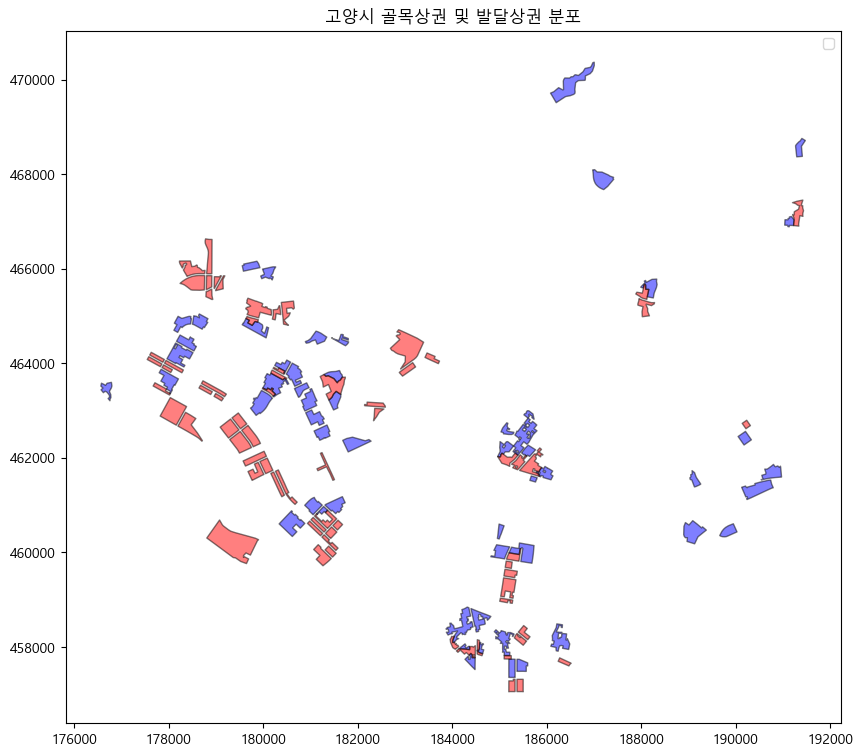

In [4]:
# plot golmok and baldal markets on map 
fig, ax = plt.subplots(figsize=(10, 10))
golmok.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', label='골목상권')
baldal.plot(ax=ax, color='red', alpha=0.5, edgecolor='k', label='발달상권')
plt.legend()
plt.title('고양시 골목상권 및 발달상권 분포')

In [5]:
# check if there are duplicates in trdar_nm
print("골목상권 중복 상권명:", golmok['trdar_nm'][golmok['trdar_nm'].duplicated()])
print("발달상권 중복 상권명:", baldal['trdar_nm'][baldal['trdar_nm'].duplicated()]) 

# if ['trdar_nm'] == '중앙로' add the type suffix to differentiate


골목상권 중복 상권명: Series([], Name: trdar_nm, dtype: object)
발달상권 중복 상권명: 23    중앙로
65    중앙로
Name: trdar_nm, dtype: object


In [6]:
# merge golmok and baldal data for further analysis
golmok['type'] = '골목상권'
baldal['type'] = '발달상권'
markets = pd.concat([golmok, baldal], ignore_index=True)

# add columns that have trdar_nm and type for easier identification

markets

,trdar_id,trdar_se_c,tdmkt_clss,trdar_nm,main_biztp,min_xcrd,min_ycrd,max_xcrd,max_ycrd,cntr_xcrd,cntr_ycrd,relm_ar,dong_cd,reg_ymd,geometry,type
0,1860,2,None,지도로,None,184398.811692,458315.993000,184820.248879,458811.215166,184569.984898,458565.776146,82623.448830,31101640,None,"POLYGON ((184820.249 458644.852, 184797.69 458...",골목상권
1,1083,2,None,고풍로43번길,None,181683.969308,462125.632490,182285.895708,462438.063794,181940.252876,462294.688334,94268.825308,31103540,None,"POLYGON ((182238.802 462388.169, 182285.896 46...",골목상권
2,1117,2,None,신원로1길,None,190051.626481,462272.438638,190333.563681,462561.059480,190192.559867,462417.285578,41725.806250,31101520,None,"POLYGON ((190177.645 462272.439, 190051.626 46...",골목상권
3,1045,2,None,지도로35번길,None,184142.107275,457941.045400,184375.372020,458064.645588,184237.022676,458001.914856,12718.061469,31101640,None,"POLYGON ((184355.636 458013.449, 184364.985 45...",골목상권
4,1037,2,None,동산2로,None,189662.553056,460329.347398,190029.134073,460605.716211,189869.886738,460465.846426,57376.392454,31101580,None,"POLYGON ((189865.515 460360.335, 189809.775 46...",골목상권
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,218,1,None,중앙로,None,178961.865212,463206.158834,179160.478000,463362.580676,179063.867152,463281.285898,13121.541628,31104550,None,"POLYGON ((179099.425 463301.958, 179160.478 46...",발달상권
122,684,1,None,백석역_5번출구,None,181013.197323,460429.471793,181335.018826,460740.407077,181152.575273,460605.911375,25682.444540,31103550,None,"POLYGON ((181283.147 460527.126, 181322.887 46...",발달상권
123,781,1,None,경의로,None,178796.280408,465559.687770,178915.193784,465856.983726,178857.772654,465725.997351,30390.181248,31104513,None,"POLYGON ((178915.194 465855.588, 178913.338 46...",발달상권
124,885,1,None,일산로_1,None,181476.559314,460474.273587,181682.134879,460681.643700,181579.404107,460578.497821,21139.504876,31103550,None,"POLYGON ((181622.641 460645.539, 181622.811 46...",발달상권


In [7]:
# export markets file 

markets.to_file("C:/Users/고양연구원/Desktop/지역경제/고양시_발달골목상권_SHAPE/고양시_골목발달상권_병합.geojson", driver='GeoJSON', encoding='utf-8')

In [8]:
# 매출액 및 매출건수 데이터 불러오기 

sales = pd.read_excel("C:/Users/고양연구원/Desktop/지역경제/상권분석/비스타(자료)/상권분석/고양상권분석/4.매출액(전체업종).xlsx")
sale_count = pd.read_excel("C:/Users/고양연구원/Desktop/지역경제/상권분석/비스타(자료)/상권분석/고양상권분석/5.매출건수(전체업종).xlsx")

# rename unnamed columns 
sales.rename(columns={'Unnamed: 0':'trdar_nm'}, inplace=True)
sale_count.rename(columns={'Unnamed: 0':'trdar_nm'}, inplace=True)

print(sales.head())
print(sale_count.head())

   trdar_nm   2024_07   2024_08   2024_09   2024_10   2024_11   2024_12  \
0  강성로232번길   4215849   4132453   4328175   4443071   4383079   4940075   
1  강송로113번길   4429148   4316051   4478202   4968802   5220723   5925385   
2   강송로73번길   8333720   8784287   8715394   8844597   8837636  10015606   
3       경의로   5829817   9349828   5610693   7546060   6612771   6321674   
4      고골길   15140476  14585979  15416681  14127032  15013466  14193804   

    2025_01   2025_02   2025_03   2025_04   2025_05     2025_06  
0   4147747   4058235   4731523   5118328   4861201   4230984.0  
1   5418594   4358764   4785486   5213276   5100096   5081805.0  
2   7887057   7187579   9165085   8326707   8730035   8045923.0  
3   5055976   5573560  13161970   8759443   8758844   8904348.0  
4  12999560  10795750  14171953  14025129  15101928  14057015.0  
   trdar_nm  2024_07  2024_08  2024_09  2024_10  2024_11  2024_12  2025_01  \
0  강성로232번길      193      180      189      200      183      179      169 

In [9]:
pd.options.display.float_format = '{:.3f}'.format

sales.describe()

,2024_07,2024_08,2024_09,2024_10,2024_11,2024_12,2025_01,2025_02,2025_03,2025_04,2025_05,2025_06
count,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,122.000,121.000
mean,14453449.246,14493155.377,13753143.344,14529103.893,14205582.041,15014954.107,13403341.918,12413575.836,14157848.533,13843420.713,14775773.008,13936993.413
std,28648555.185,26838982.394,21790482.404,25066158.887,25725600.029,28990865.688,22791434.154,19477594.412,21632180.098,19850664.956,23823625.671,23531527.976
min,710230.000,931282.000,750491.000,692347.000,246789.000,397112.000,298702.000,767904.000,671980.000,225825.000,292230.000,408913.000
25%,6163664.500,6249189.250,6255872.000,6307313.750,5824752.250,6147673.750,5599449.250,5109046.750,6335359.000,6036513.750,6862719.750,6127977.000
50%,8549540.500,8781692.500,8717526.500,9199122.500,8837455.500,9183721.000,8241351.500,7625724.000,9238983.000,8849726.000,9171029.500,8660734.000
75%,12741943.000,12957991.000,12564075.500,13190753.000,12118527.500,12870359.750,12190679.500,11204975.250,13391419.750,13419286.750,13918206.750,12970517.000
max,292665915.000,271101927.000,216209538.000,253676026.000,259669307.000,298040827.000,224540202.000,180910608.000,205076807.000,181128495.000,229747835.000,232704189.000


In [10]:
# merge markets data with sales data 
markets_sales = markets.merge(sales, left_on='trdar_nm', right_on='trdar_nm', how='left')
markets_sales

,trdar_id,trdar_se_c,tdmkt_clss,trdar_nm,main_biztp,min_xcrd,min_ycrd,max_xcrd,max_ycrd,cntr_xcrd,...,2024_09,2024_10,2024_11,2024_12,2025_01,2025_02,2025_03,2025_04,2025_05,2025_06
0,1860,2,None,지도로,None,184398.812,458315.993,184820.249,458811.215,184569.985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1083,2,None,고풍로43번길,None,181683.969,462125.632,182285.896,462438.064,181940.253,...,6531078.000,8768451.000,6056541.000,6479275.000,5312267.000,5546665.000,11011771.000,8256920.000,9108195.000,6148345.000
2,1117,2,None,신원로1길,None,190051.626,462272.439,190333.564,462561.059,190192.560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1045,2,None,지도로35번길,None,184142.107,457941.045,184375.372,458064.646,184237.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1037,2,None,동산2로,None,189662.553,460329.347,190029.134,460605.716,189869.887,...,5306360.000,5152343.000,4744266.000,4629182.000,4608084.000,4863290.000,5289473.000,5668560.000,5342883.000,5479688.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,218,1,None,중앙로,None,178961.865,463206.159,179160.478,463362.581,179063.867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,684,1,None,백석역_5번출구,None,181013.197,460429.472,181335.019,460740.407,181152.575,...,11267170.000,12289386.000,11175062.000,11162059.000,9453823.000,9769684.000,10290953.000,11351028.000,10080276.000,9913806.000
123,781,1,None,경의로,None,178796.280,465559.688,178915.194,465856.984,178857.773,...,5610693.000,7546060.000,6612771.000,6321674.000,5055976.000,5573560.000,13161970.000,8759443.000,8758844.000,8904348.000
124,885,1,None,일산로_1,None,181476.559,460474.274,181682.135,460681.644,181579.404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(markets_sales.isnull().sum())
# print rows that have null values in sales columns


trdar_id        0
trdar_se_c      0
tdmkt_clss    126
trdar_nm        0
main_biztp    126
min_xcrd        0
min_ycrd        0
max_xcrd        0
max_ycrd        0
cntr_xcrd       0
cntr_ycrd       0
relm_ar         0
dong_cd         0
reg_ymd       126
geometry        0
type            0
2024_07        21
2024_08        21
2024_09        21
2024_10        21
2024_11        21
2024_12        21
2025_01        21
2025_02        21
2025_03        21
2025_04        21
2025_05        21
2025_06        22
dtype: int64


In [12]:
# print rows that have null values in sales columns
print(markets_sales[markets_sales['2024_07'].isnull()])

     trdar_id trdar_se_c tdmkt_clss trdar_nm main_biztp   min_xcrd   min_ycrd  \
0        1860          2       None      지도로       None 184398.812 458315.993   
2        1117          2       None    신원로1길       None 190051.626 462272.439   
3        1045          2       None  지도로35번길       None 184142.107 457941.045   
22       1323          2       None  마상로57번길       None 185034.057 462494.706   
23       1325          2       None      토당로       None 184272.011 457520.271   
29       1360          2       None      고골길       None 186973.989 467676.883   
52       1781          2       None     애니골길       None 181390.816 463013.484   
68        367          1       None      중앙로       None 179931.502 461665.713   
76        886          1       None   이마트탄현점       None 178789.430 465351.723   
79        622          1       None      중앙로       None 186244.025 457597.353   
87        718          1       None      토당로       None 183957.737 457949.723   
89        626          1    

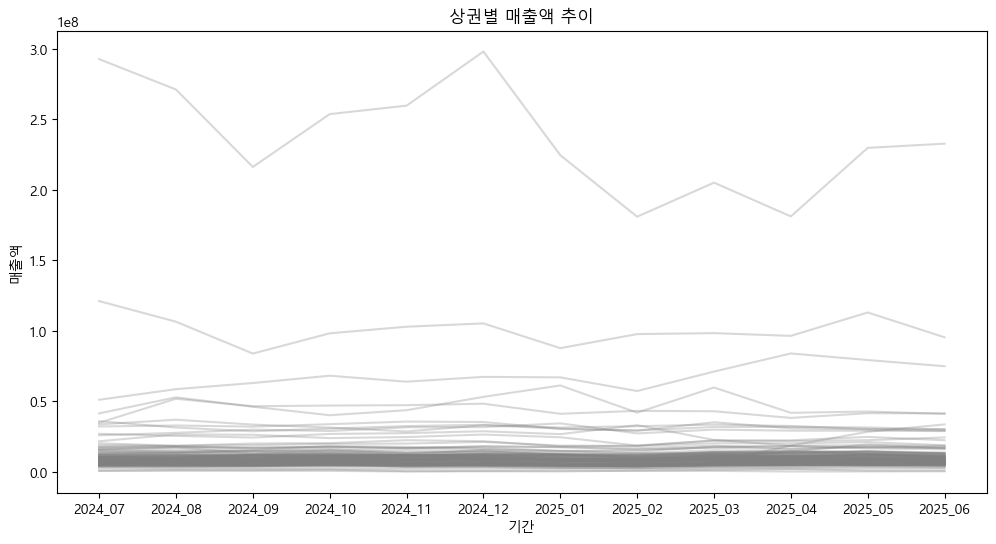

In [13]:
# plot time series of market sales 
time_cols = [col for col in markets_sales.columns if col.startswith('20')]
plt.figure(figsize=(12, 6))
for idx, row in markets_sales.iterrows():
    plt.plot(time_cols, row[time_cols], alpha=0.3, color='gray')
plt.title('상권별 매출액 추이')
plt.xlabel('기간')
plt.ylabel('매출액')
plt.show()


In [15]:
# normalize sales data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
markets_sales_scaled = markets_sales.copy()
markets_sales_scaled[time_cols] = scaler.fit_transform(markets_sales[time_cols])
markets_sales_scaled

,trdar_id,trdar_se_c,tdmkt_clss,trdar_nm,main_biztp,min_xcrd,min_ycrd,max_xcrd,max_ycrd,cntr_xcrd,...,2024_09,2024_10,2024_11,2024_12,2025_01,2025_02,2025_03,2025_04,2025_05,2025_06
0,1860,2,None,지도로,None,184398.812,458315.993,184820.249,458811.215,184569.985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1083,2,None,고풍로43번길,None,181683.969,462125.632,182285.896,462438.064,181940.253,...,0.027,0.032,0.022,0.020,0.022,0.027,0.051,0.044,0.038,0.025
2,1117,2,None,신원로1길,None,190051.626,462272.439,190333.564,462561.059,190192.560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1045,2,None,지도로35번길,None,184142.107,457941.045,184375.372,458064.646,184237.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1037,2,None,동산2로,None,189662.553,460329.347,190029.134,460605.716,189869.887,...,0.021,0.018,0.017,0.014,0.019,0.023,0.023,0.030,0.022,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,218,1,None,중앙로,None,178961.865,463206.159,179160.478,463362.581,179063.867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,684,1,None,백석역_5번출구,None,181013.197,460429.472,181335.019,460740.407,181152.575,...,0.049,0.046,0.042,0.036,0.041,0.050,0.047,0.061,0.043,0.041
123,781,1,None,경의로,None,178796.280,465559.688,178915.194,465856.984,178857.773,...,0.023,0.027,0.025,0.020,0.021,0.027,0.061,0.047,0.037,0.037
124,885,1,None,일산로_1,None,181476.559,460474.274,181682.135,460681.644,181579.404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


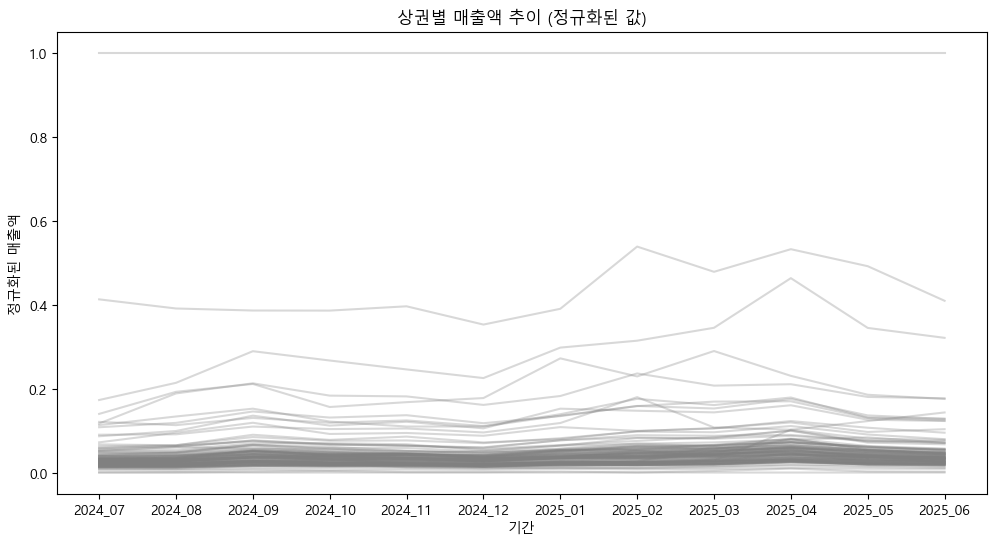

In [16]:
# plot time series of normalized market sales
plt.figure(figsize=(12, 6))
for idx, row in markets_sales_scaled.iterrows():
    plt.plot(time_cols, row[time_cols], alpha=0.3, color='gray')
plt.title('상권별 매출액 추이 (정규화된 값)')
plt.xlabel('기간')
plt.ylabel('정규화된 매출액')
plt.show()

In [17]:
# normalize sales data with log transformation
markets_sales_log = markets_sales.copy()
for col in time_cols:
    markets_sales_log[col] = np.log1p(markets_sales_log[col])
markets_sales_log

,trdar_id,trdar_se_c,tdmkt_clss,trdar_nm,main_biztp,min_xcrd,min_ycrd,max_xcrd,max_ycrd,cntr_xcrd,...,2024_09,2024_10,2024_11,2024_12,2025_01,2025_02,2025_03,2025_04,2025_05,2025_06
0,1860,2,None,지도로,None,184398.812,458315.993,184820.249,458811.215,184569.985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1083,2,None,고풍로43번길,None,181683.969,462125.632,182285.896,462438.064,181940.253,...,15.692,15.987,15.617,15.684,15.486,15.529,16.214,15.927,16.025,15.632
2,1117,2,None,신원로1길,None,190051.626,462272.439,190333.564,462561.059,190192.560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1045,2,None,지도로35번길,None,184142.107,457941.045,184375.372,458064.646,184237.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1037,2,None,동산2로,None,189662.553,460329.347,190029.134,460605.716,189869.887,...,15.484,15.455,15.372,15.348,15.343,15.397,15.481,15.550,15.491,15.517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,218,1,None,중앙로,None,178961.865,463206.159,179160.478,463362.581,179063.867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,684,1,None,백석역_5번출구,None,181013.197,460429.472,181335.019,460740.407,181152.575,...,16.237,16.324,16.229,16.228,16.062,16.095,16.147,16.245,16.126,16.109
123,781,1,None,경의로,None,178796.280,465559.688,178915.194,465856.984,178857.773,...,15.540,15.837,15.705,15.659,15.436,15.534,16.393,15.986,15.986,16.002
124,885,1,None,일산로_1,None,181476.559,460474.274,181682.135,460681.644,181579.404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


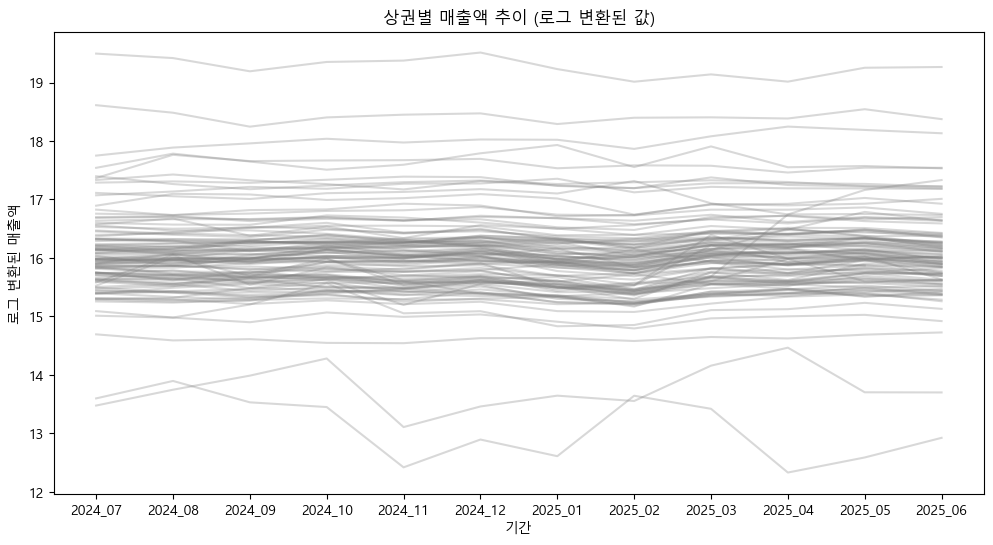

In [18]:
# plot log transformed sales data
plt.figure(figsize=(12, 6))
for idx, row in markets_sales_log.iterrows():
    plt.plot(time_cols, row[time_cols], alpha=0.3, color='gray')
plt.title('상권별 매출액 추이 (로그 변환된 값)')
plt.xlabel('기간')
plt.ylabel('로그 변환된 매출액')
plt.show()

In [56]:
markets_sales_pct_change = markets_sales.copy()

# Compute percentage change row-wise
markets_sales_pct_change[time_cols] = markets_sales[time_cols].pct_change(axis=1)

# Drop the first month (because it's always NaN)
markets_sales_pct_change = markets_sales_pct_change.drop(columns=['2024_07', '2024_08'])
markets_sales_pct_change


C:\Users\고양연구원\AppData\Local\Temp\ipykernel_6784\2018523844.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  markets_sales_pct_change[time_cols] = markets_sales[time_cols].pct_change(axis=1)


,trdar_id,trdar_se_c,tdmkt_clss,trdar_nm,main_biztp,min_xcrd,min_ycrd,max_xcrd,max_ycrd,cntr_xcrd,...,2024_09,2024_10,2024_11,2024_12,2025_01,2025_02,2025_03,2025_04,2025_05,2025_06
0,1860,2,None,지도로,None,184398.812,458315.993,184820.249,458811.215,184569.985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1083,2,None,고풍로43번길,None,181683.969,462125.632,182285.896,462438.064,181940.253,...,-0.270,0.343,-0.309,0.070,-0.180,0.044,0.985,-0.250,0.103,-0.325
2,1117,2,None,신원로1길,None,190051.626,462272.439,190333.564,462561.059,190192.560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1045,2,None,지도로35번길,None,184142.107,457941.045,184375.372,458064.646,184237.023,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1037,2,None,동산2로,None,189662.553,460329.347,190029.134,460605.716,189869.887,...,0.183,-0.029,-0.079,-0.024,-0.005,0.055,0.088,0.072,-0.057,0.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,218,1,None,중앙로,None,178961.865,463206.159,179160.478,463362.581,179063.867,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,684,1,None,백석역_5번출구,None,181013.197,460429.472,181335.019,460740.407,181152.575,...,0.090,0.091,-0.091,-0.001,-0.153,0.033,0.053,0.103,-0.112,-0.017
123,781,1,None,경의로,None,178796.280,465559.688,178915.194,465856.984,178857.773,...,-0.400,0.345,-0.124,-0.044,-0.200,0.102,1.362,-0.334,-0.000,0.017
124,885,1,None,일산로_1,None,181476.559,460474.274,181682.135,460681.644,181579.404,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
markets_sales_pct_change.describe()

,trdar_id,min_xcrd,min_ycrd,max_xcrd,max_ycrd,cntr_xcrd,cntr_ycrd,relm_ar,2024_09,2024_10,2024_11,2024_12,2025_01,2025_02,2025_03,2025_04,2025_05,2025_06
count,126.000,126.000,126.000,126.000,126.000,126.000,126.000,126.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000,105.000
mean,927.317,182491.274,462138.497,182840.001,462491.002,182664.858,462314.324,61604.372,-0.002,0.061,-0.058,0.058,-0.090,-0.040,0.193,0.004,0.043,-0.054
std,492.880,3600.533,2666.840,3581.170,2686.352,3590.273,2675.924,55997.142,0.108,0.103,0.122,0.103,0.090,0.206,0.199,0.226,0.123,0.082
min,51.000,176565.750,457049.776,176800.773,457314.234,176715.431,457160.724,10833.418,-0.400,-0.144,-0.691,-0.186,-0.338,-0.314,-0.317,-0.664,-0.534,-0.325
25%,620.500,179633.861,460303.339,180081.990,460664.869,179822.465,460428.320,25936.544,-0.056,-0.008,-0.085,0.004,-0.157,-0.115,0.102,-0.060,-0.015,-0.098
50%,866.000,181298.325,462362.689,181616.299,462769.517,181497.789,462576.071,48110.080,0.004,0.051,-0.047,0.056,-0.099,-0.068,0.181,-0.019,0.049,-0.058
75%,1329.750,185144.548,463862.221,185372.581,464123.653,185258.514,464015.156,81069.319,0.063,0.104,0.007,0.098,-0.030,0.005,0.235,0.036,0.094,-0.011
max,1860.000,191267.761,469516.407,191475.421,470373.407,191334.455,469957.810,450806.325,0.272,0.434,0.102,0.609,0.203,1.813,1.362,1.888,0.522,0.399


In [58]:
markets_sales_pct_change.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   trdar_id    126 non-null    int64   
 1   trdar_se_c  126 non-null    object  
 2   tdmkt_clss  0 non-null      object  
 3   trdar_nm    126 non-null    object  
 4   main_biztp  0 non-null      object  
 5   min_xcrd    126 non-null    float64 
 6   min_ycrd    126 non-null    float64 
 7   max_xcrd    126 non-null    float64 
 8   max_ycrd    126 non-null    float64 
 9   cntr_xcrd   126 non-null    float64 
 10  cntr_ycrd   126 non-null    float64 
 11  relm_ar     126 non-null    float64 
 12  dong_cd     126 non-null    object  
 13  reg_ymd     0 non-null      object  
 14  geometry    126 non-null    geometry
 15  type        126 non-null    object  
 16  2024_09     105 non-null    float64 
 17  2024_10     105 non-null    float64 
 18  2024_11     105 non-null    float64 
 19  

In [59]:
markets_sales_pct_change.isnull().sum()

trdar_id        0
trdar_se_c      0
tdmkt_clss    126
trdar_nm        0
main_biztp    126
min_xcrd        0
min_ycrd        0
max_xcrd        0
max_ycrd        0
cntr_xcrd       0
cntr_ycrd       0
relm_ar         0
dong_cd         0
reg_ymd       126
geometry        0
type            0
2024_09        21
2024_10        21
2024_11        21
2024_12        21
2025_01        21
2025_02        21
2025_03        21
2025_04        21
2025_05        21
2025_06        21
dtype: int64

In [ ]:
# drop columns that have null values in pct 

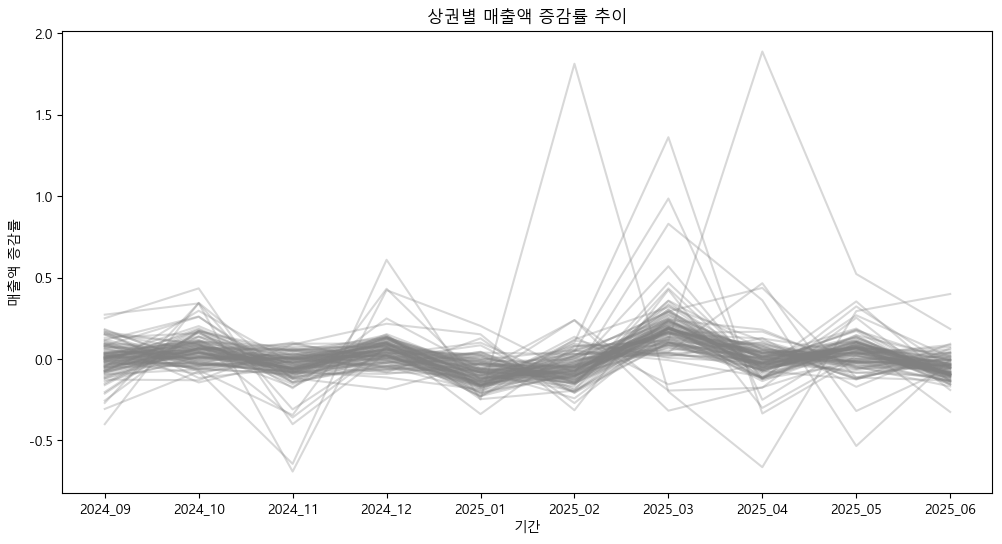

In [61]:
# plot time series of market sales percentage change
plt.figure(figsize=(12, 6))
for idx, row in markets_sales_pct_change.iterrows():
    plt.plot(markets_sales_pct_change.columns[markets_sales_pct_change.columns.str.startswith('20')], row[markets_sales_pct_change.columns[markets_sales_pct_change.columns.str.startswith('20')]], alpha=0.3, color='gray')
plt.title('상권별 매출액 증감률 추이')
plt.xlabel('기간')
plt.ylabel('매출액 증감률')
plt.show()

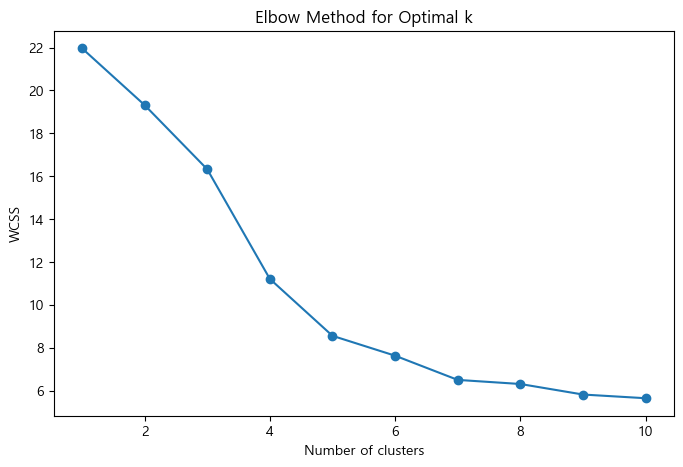

In [63]:
# elbow method to find optimal number of clusters for k-means using markets sales percentage change data
from sklearn.cluster import KMeans
wcss = []
# time_cols excluding the item from the time_cols list that does not have a percentage change value
time_cols = ['2024_09', '2024_10', '2024_11', '2024_12', '2025_01', '2025_02', '2025_03', '2025_04', '2025_05', '2025_06']
# get values and drop rows with NaN values
markets_sales_pct_change_clean = markets_sales_pct_change[time_cols].dropna()
X = markets_sales_pct_change_clean.values
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

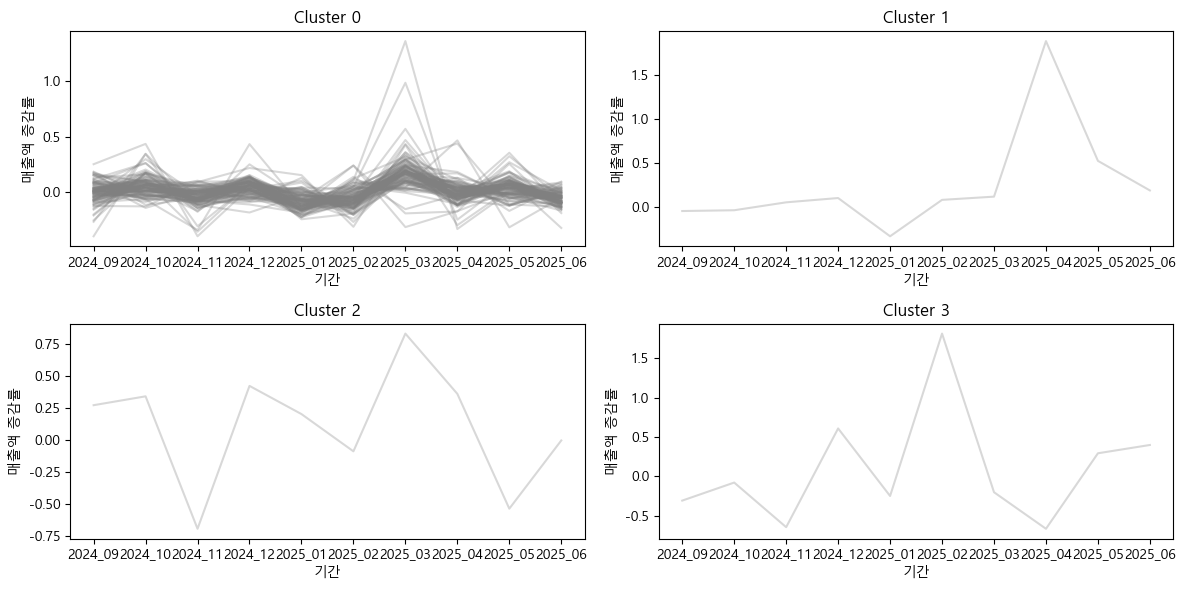

In [65]:
# cluster markets using k-means with optimal number of clusters (k=4) based on percentage change data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
markets_sales_pct_change_clean['cluster'] = kmeans.labels_
markets_sales_pct_change_clean

# plot clusters based on percentage change time series
plt.figure(figsize=(12, 6))
for cluster in range(4):
    plt.subplot(2, 2, cluster + 1)
    cluster_data = markets_sales_pct_change_clean[markets_sales_pct_change_clean['cluster'] == cluster]
    for idx, row in cluster_data.iterrows():
        plt.plot(cluster_data.columns[cluster_data.columns.str.startswith('20')], row[cluster_data.columns[cluster_data.columns.str.startswith('20')]], alpha=0.3, color='gray')
    plt.title(f'Cluster {cluster}')
    plt.xlabel('기간')
    plt.ylabel('매출액 증감률')
plt.tight_layout()
plt.show()

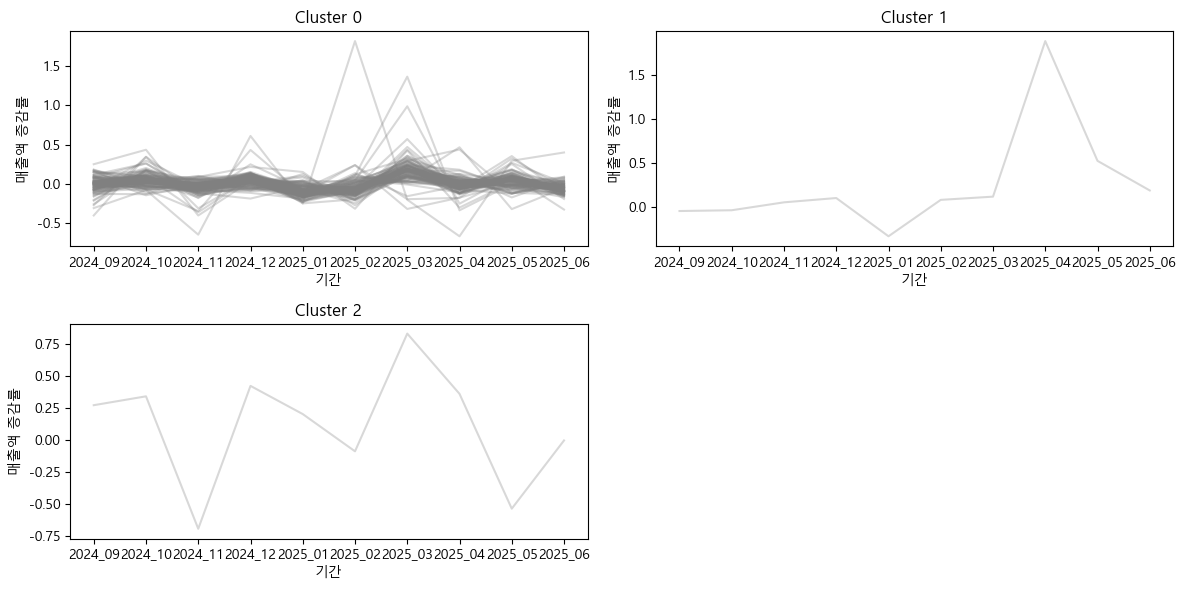

In [67]:
# cluster markets using k-means with optimal number of clusters (k=3) based on percentage change data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
markets_sales_pct_change_clean['cluster'] = kmeans.labels_
markets_sales_pct_change_clean
# plot clusters based on percentage change time series
plt.figure(figsize=(12, 6))
for cluster in range(3):
    plt.subplot(2, 2, cluster + 1)
    cluster_data = markets_sales_pct_change_clean[markets_sales_pct_change_clean['cluster'] == cluster]
    for idx, row in cluster_data.iterrows():
        plt.plot(cluster_data.columns[cluster_data.columns.str.startswith('20')], row[cluster_data.columns[cluster_data.columns.str.startswith('20')]], alpha=0.3, color='gray')
    plt.title(f'Cluster {cluster}')
    plt.xlabel('기간')
    plt.ylabel('매출액 증감률')
plt.tight_layout()
plt.show()